### Logistic Regression
- Data Preparation
- Visualisation
- Create test and train data
- Create a logistic regression model
- Predictions
- Decision Boundary
- How to use Sk-learn

In [25]:
# Data Generation using Numpy

import numpy as np
import matplotlib.pyplot as plt

In [26]:
mean_O1 = np.array([1, 0.5])
cov_O1 = np.array([[1, 0.1], [0.1, 1.2]])

mean_O2 = np.array([4, 5])
cov_O2 = np.array([[1.2, 0.1], [0.1, 1.3]])

dist_O1 = np.random.multivariate_normal(mean_O1, cov_O1, 500)
dist_O2 = np.random.multivariate_normal(mean_O2, cov_O2, 500)

print(dist_O1.shape, dist_O2.shape)

(500, 2) (500, 2)


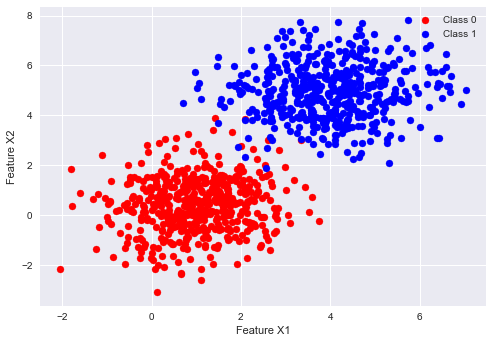

In [27]:
plt.style.use('seaborn')

plt.scatter(dist_O1[ : , 0], dist_O1[ : , 1], color = 'red', label = 'Class 0')
plt.scatter(dist_O2[ : , 0], dist_O2[ : , 1], color = 'blue', label = 'Class 1')

plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

plt.legend()
plt.show()

In [28]:
data = np.zeros((1000, 3))

In [29]:
data[ : 500, : 2] = dist_O1
data[500 : , : 2] = dist_O2

data[500 : , -1] = 1

In [30]:
# Randomly Shuffle Data

np.random.shuffle(data)
print(data[ : 10])

[[ 4.74381431  4.83597404  1.        ]
 [ 1.47255946 -1.33295225  0.        ]
 [ 1.49496091  3.70344487  1.        ]
 [ 4.16926808  7.73009171  1.        ]
 [ 5.491135    7.11521719  1.        ]
 [ 0.48433678 -1.63129898  0.        ]
 [ 4.7335926   4.11082454  1.        ]
 [ 1.94423387  5.34663222  1.        ]
 [ 3.58969586  4.54867637  1.        ]
 [ 2.51314409  4.0925595   1.        ]]


In [31]:
# Divide the data into train and test part

split = int(0.8 * data.shape[0])

X_train = data[ : split, : -1]
X_test = data[split : , : -1]

Y_train = data[ : split, -1]
Y_test = data[split : , -1]

In [32]:
print(Y_test)

[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1.]


### Plot the training data and Normalize it 

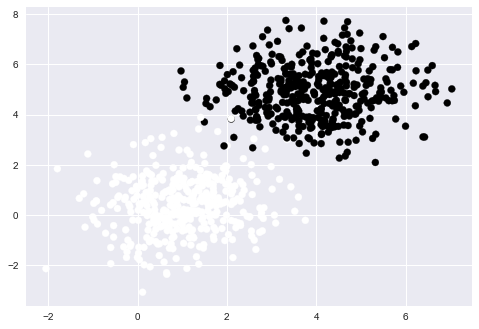

In [33]:
plt.scatter(X_train[ : , 0], X_train[ : , 1], c = Y_train)
plt.show()

In [34]:
x_mean = X_train.mean(axis = 0)
x_std = X_train.std(axis = 0)

In [35]:
print(x_mean)
print(x_std)

[2.49059992 2.65556117]
[1.79673875 2.50472797]


In [36]:
X_train = (X_train - x_mean) / x_std
X_test = (X_test - x_mean) / x_std

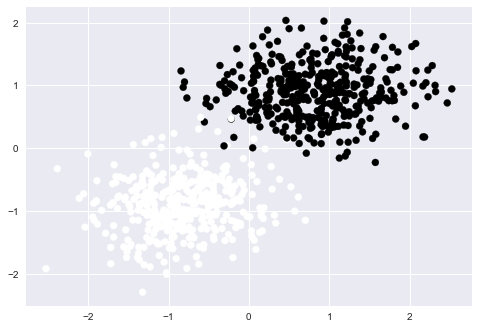

In [37]:
plt.scatter(X_train[ : , 0], X_train[ : , 1], c = Y_train)
plt.show()

In [42]:
print(X_train.mean(axis = 0))
print(X_train.std(axis = 0))

[-6.42264020e-16 -3.70398157e-16]
[1. 1.]


In [44]:
a = np.linspace(-10, 10, 20)

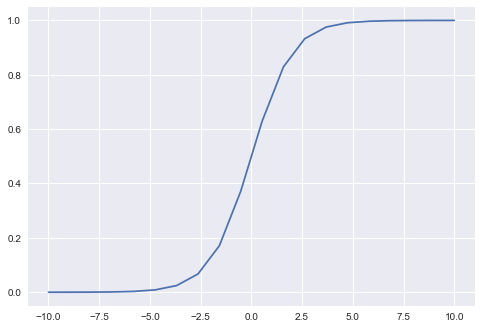

In [45]:
plt.plot(a, sigmoid(a))

### Logistic Regression Implementation

In [39]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [41]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [46]:
def error(X, y, theta):
    h = hypothesis(X, theta)
    e = -1 * np.mean((y * np.log(h) + ((1 - y) * np.log(1 - h))))
    return e